<h1> Peer-graded Assignment: Capstone Project - Car accident severity </h1>

<h2>Table of content</h2>

<ul>
    <li><a href="#introduction">Introduction</a> </li>
    <li><a href="#meth">Methodology</a></li>
    <ul>
        <li><a href="#data_prep">Data analysis and preparation</a></li>
            <ul>
                <li><a href="#analysis">High level data analysis</a></li>
                <li><a href="#missing_values">Identifying and dealing with missing values</a></li>
                <li><a href="#correct_data_format">Correct data format</a></li>
                <li><a href="#data_normalization">Data Normalization (centering/scaling)</a></li>
            </ul>
        <li><a href="#data_vis">Data visualization</a></li>
            <ul>
                <li><a href="#crosstab">Cross-tab counts and representations for number of pedestrians, cyclists, and people involved in accidents and the severity of the accident</a></li>
                <li><a href="#weather">Analysis and representations for weather, light and road conditions and the severity of the accident </a></li>
                <li><a href="#spatial">Spatial distribution of accidents</a></li>
            </ul>
        <li><a href="#classification">Building a classification model</a></li>
             <ul>
                 <li><a href="#conversion">Convert Categorical features to numerical values</a></li>
                 <li><a href="#feature">Feature selection </a></li>
                 <li><a href="#normalization">Normalize data</a></li>
                 <li><a href="#knn">K Nearest Neighbor model</a></li>
             </ul>
         <li><a href="#eval">Model evaluation</a></li>
      </ul>
    <li><a href="#results">Results</a></li>
<hr>

<h2> Introduction </h2> <a name="introduction"></a>

In this project I will try to analyze the circumstances of car accidents and set up a model to predict the severity of an accident. <br>
With this model could warnings will be given the weather and the road conditions about the possibility of getting into a car accident.<br>
The data set used in this project will be the data set shared in the Coursera Applied Data Science Capstone Project.

<h2> Methodology</h2> <a name="meth"></a>

<h3> Data analysis and preparation </h3> <a name="data_prep"></a>

<h4> High level data analysis </h4> <a name="analysis"></a>

First of all, the car accident data set was downloaded from <a href=https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv>here</a>. <br>
The fields in the dataset are described as the following:
<table>				
<tr>	<th style="text-align:left">Attribute </th>	<th style="text-align:left">Data type, length </th>	<th style="text-align:left">Description </th>	</tr>
<tr>	<td style="text-align:left">OBJECTID</td>	<td style="text-align:left">ObjectID</td>	<td style="text-align:left">ESRI unique identifier</td>	</tr>
<!-- <tr>	<td style="text-align:left">SHAPE</td>	<td style="text-align:left">Geometry</td>	<td style="text-align:left">ESRI geometry field</td>	</tr>-->
<tr>	<td style="text-align:left">INCKEY</td>	<td style="text-align:left">Long</td>	<td style="text-align:left">A unique key for the incident</td>	</tr>
<tr>	<td style="text-align:left">COLDETKEY</td>	<td style="text-align:left">Long</td>	<td style="text-align:left">Secondary key for the incident</td>	</tr>
<tr>	<td style="text-align:left">ADDRTYPE</td>	<td style="text-align:left">Text, 12</td>	<td style="text-align:left">Collision address type: - Alley, - Block, - Intersection</td>	</tr>
<tr>	<td style="text-align:left">INTKEY</td>	<td style="text-align:left">Double</td>	<td style="text-align:left">Key that corresponds to the intersection associated with a collision</td>	</tr>
<tr>	<td style="text-align:left">LOCATION</td>	<td style="text-align:left">Text, 255</td>	<td style="text-align:left">Description of the general location of the collision</td>	</tr>
<tr>	<td style="text-align:left">EXCEPTRSNCODE</td>	<td style="text-align:left">Text, 10</td>	<td style="text-align:left"> </td>	</tr>
<tr>	<td style="text-align:left">EXCEPTRSNDESC</td>	<td style="text-align:left">Text, 300</td>	<td style="text-align:left"> </td>	</tr>
<tr>	<td style="text-align:left">SEVERITYCODE</td>	<td style="text-align:left">Text, 100</td>	"<td style="text-align:left">A code that corresponds to the severity of the collision: - 3: fatality, - 2b—serious injury, - 2—injury - 1: prop damage, - 0: unknown</td>"	</tr>
<tr>	<td style="text-align:left">SEVERITYDESC</td>	<td style="text-align:left">Text</td>	<td style="text-align:left">A detailed description of the severity of the collision</td>	</tr>
<tr>	<td style="text-align:left">COLLISIONTYPE</td>	<td style="text-align:left">Text, 300</td>	<td style="text-align:left">Collision type</td>	</tr>
<tr>	<td style="text-align:left">PERSONCOUNT</td>	<td style="text-align:left">Double</td>	<td style="text-align:left">The total number of people involved in the collision</td>	</tr>
<tr>	<td style="text-align:left">PEDCOUNT</td>	<td style="text-align:left">Double</td>	<td style="text-align:left">The number of pedestrians involved in the collision. This is entered by the state.</td>	</tr>
<tr>	<td style="text-align:left">PEDCYLCOUNT</td>	<td style="text-align:left">Double</td>	<td style="text-align:left">The number of bicycles involved in the collision. This is entered by the state.</td>	</tr>
<tr>	<td style="text-align:left">VEHCOUNT</td>	<td style="text-align:left">Double</td>	<td style="text-align:left">The number of vehicles involved in the collision. This is entered by the state.</td>	</tr>
<!--<tr>	<td style="text-align:left">INJURIES</td>	<td style="text-align:left">Double</td>	<td style="text-align:left">The number of total injuries in the collision. This is entered by the state.</td>	</tr>
<tr>	<td style="text-align:left">SERIOUSINJURIES</td>	<td style="text-align:left">Double</td>	<td style="text-align:left">The number of serious injuries in the collision. This is entered by the state.</td>	</tr>
<tr>	<td style="text-align:left">FATALITIES</td>	<td style="text-align:left">Double</td>	<td style="text-align:left">The number of fatalities in the collision. This is entered by the state.</td>	</tr>-->
<tr>	<td style="text-align:left">INCDATE</td>	<td style="text-align:left">Date</td>	<td style="text-align:left">The date of the incident.</td>	</tr>
<tr>	<td style="text-align:left">INCDTTM</td>	<td style="text-align:left">Text, 30</td>	<td style="text-align:left">The date and time of the incident.</td>	</tr>
<tr>	<td style="text-align:left">JUNCTIONTYPE</td>	<td style="text-align:left">Text, 300</td>	<td style="text-align:left">Category of junction at which collision took place</td>	</tr>
<tr>	<td style="text-align:left">SDOT_COLCODE</td>	<td style="text-align:left">Text, 10</td>	<td style="text-align:left">A code given to the collision by SDOT.</td>	</tr>
<tr>	<td style="text-align:left">SDOT_COLDESC</td>	<td style="text-align:left">Text, 300</td>	<td style="text-align:left">A description of the collision corresponding to the collision code.</td>	</tr>
<tr>	<td style="text-align:left">INATTENTIONIND</td>	<td style="text-align:left">Text, 1</td>	<td style="text-align:left">Whether or not collision was due to inattention. (Y/N)</td>	</tr>
<tr>	<td style="text-align:left">UNDERINFL</td>	<td style="text-align:left">Text, 10</td>	<td style="text-align:left">Whether or not a driver involved was under the influence of drugs or alcohol.</td>	</tr>
<tr>	<td style="text-align:left">WEATHER</td>	<td style="text-align:left">Text, 300</td>	<td style="text-align:left">A description of the weather conditions during the time of the collision.</td>	</tr>
<tr>	<td style="text-align:left">ROADCOND</td>	<td style="text-align:left">Text, 300</td>	<td style="text-align:left">The condition of the road during the collision.</td>	</tr>
<tr>	<td style="text-align:left">LIGHTCOND</td>	<td style="text-align:left">Text, 300</td>	<td style="text-align:left">The light conditions during the collision.</td>	</tr>
<tr>	<td style="text-align:left">PEDROWNOTGRNT</td>	<td style="text-align:left">Text, 1</td>	<td style="text-align:left">Whether or not the pedestrian right of way was not granted. (Y/N)</td>	</tr>
<tr>	<td style="text-align:left">SDOTCOLNUM</td>	<td style="text-align:left">Text, 10</td>	<td style="text-align:left">A number given to the collision by SDOT.</td>	</tr>
<tr>	<td style="text-align:left">SPEEDING</td>	<td style="text-align:left">Text, 1</td>	<td style="text-align:left">Whether or not speeding was a factor in the collision. (Y/N)</td>	</tr>
<tr>	<td style="text-align:left">ST_COLCODE</td>	<td style="text-align:left">Text, 10</td>	<td style="text-align:left">A code provided by the state that describes the collision. For more information about these codes, please see the State Collision Code Dictionary in the end of <a href=https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf>this file</a>.</td>	</tr>
<tr>	<td style="text-align:left">ST_COLDESC</td>	<td style="text-align:left">Text, 300</td>	<td style="text-align:left">A description that corresponds to the state’s coding designation.</td>	</tr>
<tr>	<td style="text-align:left">SEGLANEKEY</td>	<td style="text-align:left">Long</td>	<td style="text-align:left">A key for the lane segment in which the collision occurred.</td>	</tr>
<tr>	<td style="text-align:left">CROSSWALKKEY</td>	<td style="text-align:left">Long</td>	<td style="text-align:left">A key for the crosswalk at which the collision occurred.</td>	</tr>
<tr>	<td style="text-align:left">HITPARKEDCAR</td>	<td style="text-align:left">Text, 1</td>	<td style="text-align:left">Whether or not the collision involved hitting a parked car. (Y/N)</td>	</tr>
</table>				

To examine the data first I import the necessary libraries, such as numpy and pandas, and then the csv file will be read into a dataframe.

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('Data-Collisions.csv', low_memory=False)
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [2]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

As a next step I checked the correlation between the data set columns so it would give a nice starting point for the primary analysis.

In [3]:
shape = df.shape
correlation = df.corr().abs()

correlation_dummy = correlation.unstack()
sorted_correlation = correlation_dummy.sort_values(kind="quicksort",ascending = False)
print(sorted_correlation.shape)
print (sorted_correlation[15:50])

(256,)
SEVERITYCODE    SEVERITYCODE.1    1.000000
SDOTCOLNUM      SDOTCOLNUM        1.000000
SEVERITYCODE    SEVERITYCODE      1.000000
INCKEY          COLDETKEY         0.999996
COLDETKEY       INCKEY            0.999996
SDOTCOLNUM      INCKEY            0.990571
                COLDETKEY         0.990571
COLDETKEY       SDOTCOLNUM        0.990571
INCKEY          SDOTCOLNUM        0.990571
OBJECTID        SDOTCOLNUM        0.969276
SDOTCOLNUM      OBJECTID          0.969276
OBJECTID        INCKEY            0.946383
INCKEY          OBJECTID          0.946383
OBJECTID        COLDETKEY         0.945837
COLDETKEY       OBJECTID          0.945837
CROSSWALKKEY    PEDCOUNT          0.565326
PEDCOUNT        CROSSWALKKEY      0.565326
PEDCYLCOUNT     SEGLANEKEY        0.453657
SEGLANEKEY      PEDCYLCOUNT       0.453657
PEDCYLCOUNT     SDOT_COLCODE      0.382521
SDOT_COLCODE    PEDCYLCOUNT       0.382521
PERSONCOUNT     VEHCOUNT          0.380523
VEHCOUNT        PERSONCOUNT       0.380523
SDOT

While checking the above table description and the correlation coefficient, some conclusions can be made about the data:
<ul>
    <li>SEVERITYCODE  and SEVERITYCODE.1 columns probably contain the same data, so SEVERITYCODE.1 can and will be dropped. </li>
    <li>INCDATE and INCDTTM contain the date and the date-time of the accident, therefore INCDATE is redundant so it will be dropped.</li>
    <li>SDOT_COLCODE depends on the severity and PERSONCOUNT of the accident.</li>
    <li>LOCATION and X,Y contain the address and the coordinates of the accident, therefore LOCATION is redundant so it will be dropped.</li>
</ul>

In [4]:
df.drop("SEVERITYCODE.1", axis = 1, inplace=True)
df.drop("INCDATE", axis = 1, inplace=True)
df.drop("LOCATION", axis = 1, inplace=True)

<h4>Identifying and dealing with missing values</h4><a name="missing_values"></a>

First, let's check which columns contain missing data.

In [5]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

X
False    189339
True       5334
Name: X, dtype: int64

Y
False    189339
True       5334
Name: Y, dtype: int64

OBJECTID
False    194673
Name: OBJECTID, dtype: int64

INCKEY
False    194673
Name: INCKEY, dtype: int64

COLDETKEY
False    194673
Name: COLDETKEY, dtype: int64

REPORTNO
False    194673
Name: REPORTNO, dtype: int64

STATUS
False    194673
Name: STATUS, dtype: int64

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

INTKEY
True     129603
False     65070
Name: INTKEY, dtype: int64

EXCEPTRSNCODE
True     109862
False     84811
Name: EXCEPTRSNCODE, dtype: int64

EXCEPTRSNDESC
True     189035
False      5638
Name: EXCEPTRSNDESC, dtype: int64

SEVERITYDESC
False    194673
Name: SEVERITYDESC, dtype: int64

COLLISIONTYPE
False    189769
True       4904
Name: COLLISIONTYPE, dtype: int64

PERSONCOUNT
False    194673
Name: PERSONCOUNT, dtype: int64

PEDCOUNT
False    194673
Name: PEDCOUNT, dtype: i

From the above numbers it could be seen that the following columns contain missing values:
<ul>
	<li>X                        </li>
	<li>Y                        </li>
	<li>ADDRTYPE                 </li>
	<li>INTKEY                   </li>
	<li>EXCEPTRSNCODE            </li>
	<li>EXCEPTRSNDESC            </li>
	<li>COLLISIONTYPE            </li>
	<li>JUNCTIONTYPE             </li>
	<li>INATTENTIONIND           </li>
	<li>UNDERINFL                </li>
	<li>WEATHER                  </li>
	<li>ROADCOND                 </li>
	<li>LIGHTCOND                </li>
	<li>PEDROWNOTGRNT            </li>
	<li>SDOTCOLNUM               </li>
	<li>SPEEDING                 </li>
	<li>ST_COLCODE               </li>
	<li>ST_COLDESC               </li>
	<li>SEGLANEKEY               </li>
</ul>

<ul>
    <li>As car accidents not necessarily happen in intersection, missing values in the INTKEY and JUNCTIONTYPE are fine.</li>
    <li>For the location related columns (X,Y) the empty fields will be filled with the mean of the other values.</li>
    <li>Missing data in categorical columns (ADDRTYPE, COLLISIONTYPE, JUNCTIONTYPE, WEATHER,UNDERINFL, ROADCOND, LIGHTCOND, 
ST_COLCODE ) will be filled with the most frequent data in the given column.</li>
    <li>As for EXCEPTRSNCODE and EXCEPTRSNDESC columns no description is provided anyway, these columns will be dropped </li>
</ul>

<h4>Dealing with missing values</h4>

In [6]:
# Location data (X,Y):
avg_X = df["X"].astype("float").mean(axis=0)
df["X"].replace(np.nan, avg_X, inplace=True)

avg_Y = df["Y"].astype("float").mean(axis=0)
df["Y"].replace(np.nan, avg_Y, inplace=True)

In [7]:
# Replace data in ADDRTYPE, COLLISIONTYPE, JUNCTIONTYPE, WEATHER, ROADCOND, LIGHTCOND, ST_COLCODE by frequency:

addrtype = df['ADDRTYPE'].value_counts().idxmax()
df["ADDRTYPE"].replace(np.nan, addrtype, inplace=True)

coltype = df['COLLISIONTYPE'].value_counts().idxmax()
df["COLLISIONTYPE"].replace(np.nan, coltype, inplace=True)

junctype = df['JUNCTIONTYPE'].value_counts().idxmax()
df["ADDRTYPE"].replace(np.nan, junctype, inplace=True)

weathertype = df['WEATHER'].value_counts().idxmax()
df["WEATHER"].replace(np.nan, weathertype, inplace=True)

roadcondtype = df['ROADCOND'].value_counts().idxmax()
df["ROADCOND"].replace(np.nan, roadcondtype, inplace=True)

lightcondtype = df['LIGHTCOND'].value_counts().idxmax()
df["LIGHTCOND"].replace(np.nan, lightcondtype, inplace=True)

stcoltype = df['ST_COLCODE'].value_counts().idxmax()
df["ST_COLCODE"].replace(np.nan, stcoltype, inplace=True)



<h4>Correct data format</h4><a name=correct_data_format></a>

Unfortunately the UNDERINFL column not only just contains nan-s but it's value set is the following: ['N', '0', nan, '1', 'Y']. Therefore in this column first 'N' and 'Y' will be converted to 0 and 1 respectively and then the most frequent of these two values will be substitutied for the nan values.

In [8]:
def convert01(x):
    value=x["UNDERINFL"]
    if value == 'N':
        return 0
    elif value == 'Y':
        return 1
    elif value == '0':
        return 0
    elif value == '1':
        return 1
    else:
        return value
    
    
df['UNDERINFL']=df.apply(convert01, axis=1)   

underinfltype = df['UNDERINFL'].value_counts().idxmax()
df["UNDERINFL"].replace(np.nan, underinfltype, inplace=True)

<h3> Data visualization </h3> <a name="data_vis"></a>

Now let's have some figures that can shed light on the nature of the data.

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

<h4>Cross-tab counts and representations for number of pedestrians, cyclists, and people involved in accidents and the severity of the accident</h4> <a name="crosstab"></a>

In [10]:
sc = df["SEVERITYCODE"].value_counts()
sc_sum =df["SEVERITYCODE"].count()
#sc
#sc[1]
print("Percentage of SEV 1 incidents: ", round(sc[1]*100/sc_sum,2))
print("Percentage of SEV 2 incidents: ", round(sc[2]*100/sc_sum,2))

Percentage of SEV 1 incidents:  70.11
Percentage of SEV 2 incidents:  29.89


In [11]:
pd.crosstab(df["PERSONCOUNT"], df["SEVERITYCODE"])

SEVERITYCODE,1,2
PERSONCOUNT,,
0,3782,1762
1,9858,3296
2,86420,27811
3,22092,13461
4,8365,6295
5,3615,2969
6,1345,1357
7,494,637
8,249,284


(0.0, 10.0)

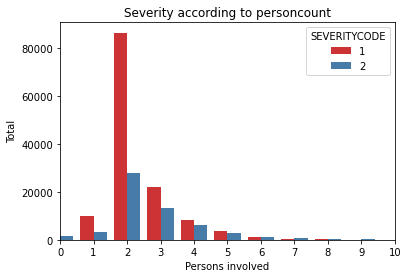

In [12]:
ax = sns.countplot(x="PERSONCOUNT",hue="SEVERITYCODE", palette="Set1",data = df)
ax.set(title="Severity according to personcount", xlabel="Persons involved", ylabel="Total")
ax.set_xlim(left=0, right=10)

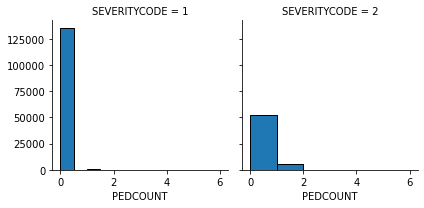

In [13]:
graph= sns.FacetGrid(df, col="SEVERITYCODE")
graph.map(plt.hist,"PEDCOUNT",bins=6, ec="k")

In [14]:
round(df['PEDCOUNT'].value_counts()*100/df["PEDCOUNT"].count(),2)

0    96.44
1     3.43
2     0.12
3     0.01
4     0.00
6     0.00
5     0.00
Name: PEDCOUNT, dtype: float64

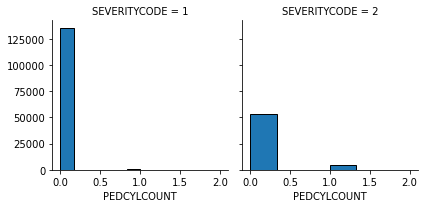

In [15]:
graph= sns.FacetGrid(df, col="SEVERITYCODE")
graph.map(plt.hist,"PEDCYLCOUNT",bins=6, ec="k")

In [16]:
round(df['PEDCYLCOUNT'].value_counts()*100/df["PEDCYLCOUNT"].count(),2)

0    97.18
1     2.79
2     0.02
Name: PEDCYLCOUNT, dtype: float64

Let's see what conlusions can be drawn from the first sight of these figures:
<ul>
    <li>The majority (70 %) of the accidents fell into the category represented by severity code 1, which is property damage.</li> 
    <li>More than 99.8 % of the accidents involved less then or equal to 10 people. </li> 
    <li>In the 96 % of the accidents no pedestrians were involved in the accident.</li> 
    <li>In the 97 % of the accidents no cyclists were involved in the accident.</li> 
</ul>

<h4>Analysis and representations for weather, light and road conditions and the severity of the accident</h4><a name="weather"></a>

[Text(0, 0.5, 'Total'),
 Text(0.5, 0, 'Road conditions'),
 Text(0.5, 1.0, 'Severity according to road conditions')]

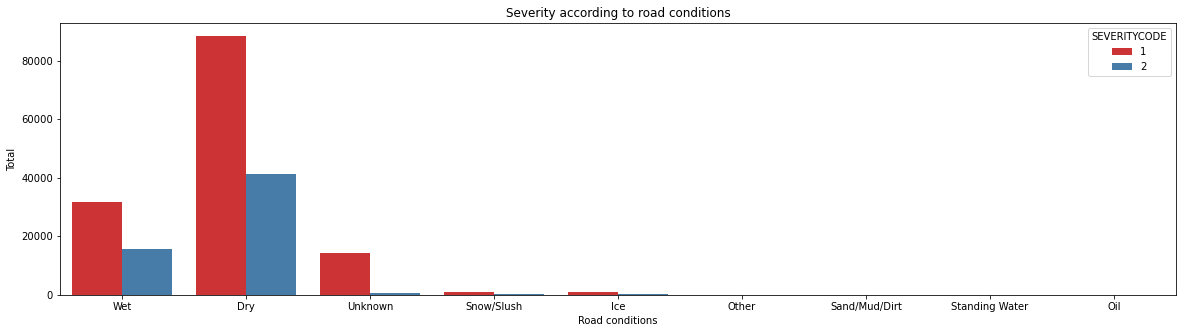

In [17]:
plt.figure(figsize=(20,5))

ax = sns.countplot(x="ROADCOND",hue="SEVERITYCODE", palette="Set1",data = df)
ax.set(title="Severity according to road conditions", xlabel="Road conditions", ylabel="Total")

[Text(0, 0.5, 'Total'),
 Text(0.5, 0, 'Weather'),
 Text(0.5, 1.0, 'Severity according to weather conditions')]

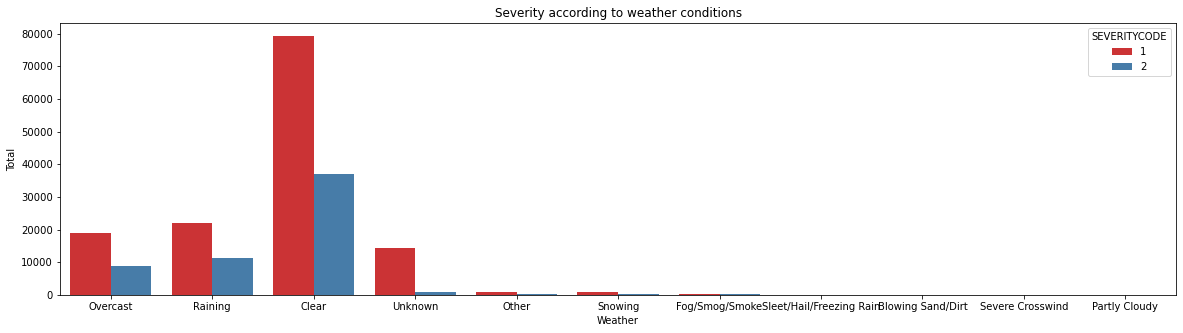

In [18]:
plt.figure(figsize=(20,5))

ax = sns.countplot(x="WEATHER",hue="SEVERITYCODE", palette="Set1",data = df)
ax.set(title="Severity according to weather conditions", xlabel="Weather", ylabel="Total")

In [19]:
df['INCDTTM']
df['month'] = pd.DatetimeIndex(df['INCDTTM']).month

[Text(0, 0.5, 'Total'),
 Text(0.5, 0, 'Month of the year'),
 Text(0.5, 1.0, 'Severity according to month of the year')]

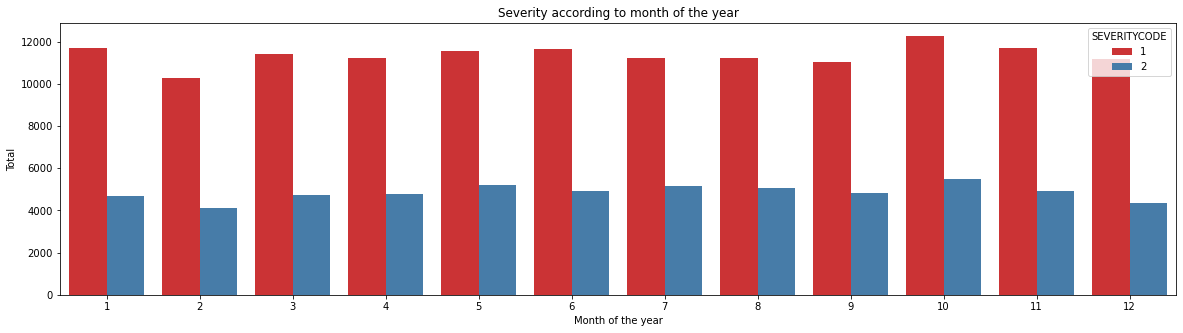

In [20]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x="month",hue="SEVERITYCODE", palette="Set1",data = df)
ax.set(title="Severity according to month of the year", xlabel="Month of the year", ylabel="Total")

[Text(0, 0.5, 'Total'),
 Text(0.5, 0, 'Light condition'),
 Text(0.5, 1.0, 'Severity according to light conditions')]

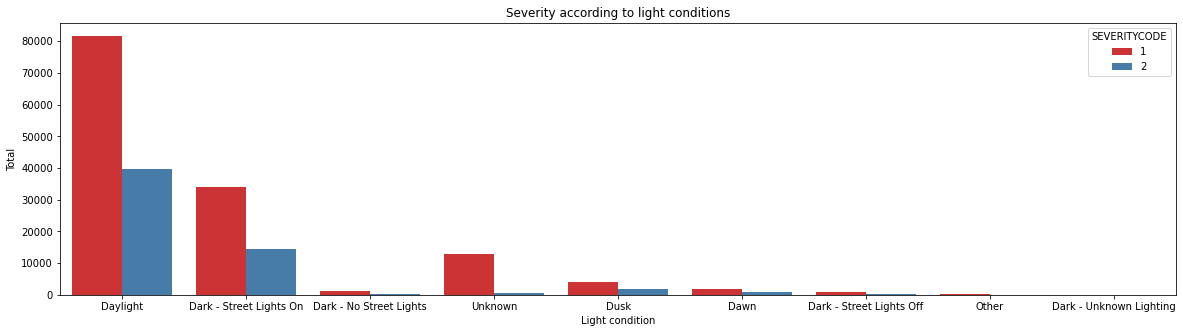

In [21]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x="LIGHTCOND",hue="SEVERITYCODE", palette="Set1",data = df)
ax.set(title="Severity according to light conditions", xlabel="Light condition", ylabel="Total")

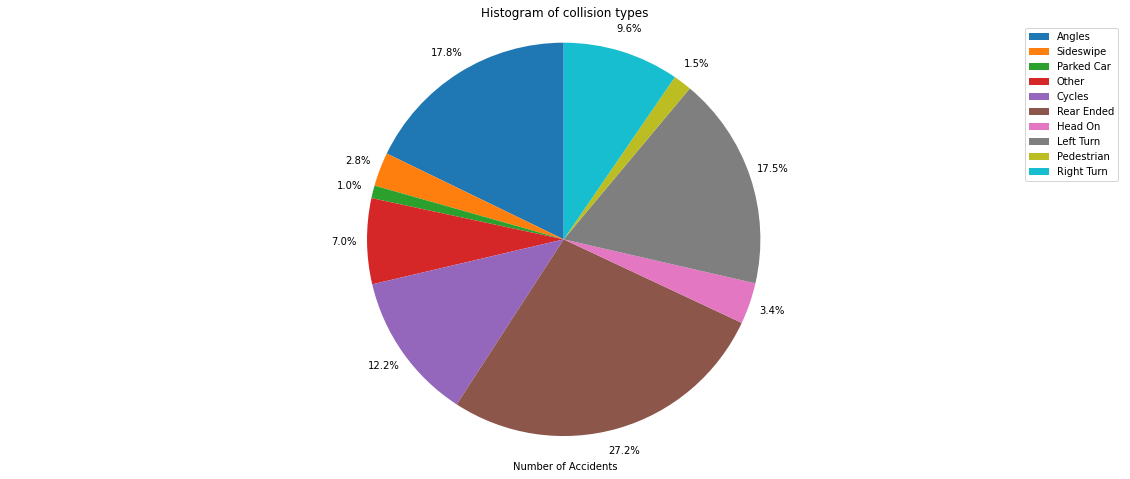

In [22]:
df_col = pd.DataFrame(columns=['COLLISIONTYPE','Count'], index=[])
df_col['COLLISIONTYPE'] = df['COLLISIONTYPE'].unique()
df_col['Count'] = df.groupby('COLLISIONTYPE', axis=0).count().INCKEY.array

df_col['Count'].plot(kind='pie',
                            figsize=(20, 8),
                            autopct='%1.1f%%', 
                            startangle=90,  
                            pctdistance=1.12,
                            labels=None,  
                            )
plt.axis('equal') 

plt.legend(labels=df_col['COLLISIONTYPE'], loc='upper right') 
plt.title('Histogram of collision types')
plt.ylabel('') 
plt.xlabel('Number of Accidents') 
plt.show()

Let's see what conlusions can be drawn from the first sight of these figures:
<ul>
    <li>The majority of both severity 1 and 2 accidents happened in clear weather conditions with dry roads in daylight.</li> 
    <li>The distribution of accidents is approximately constant in in regards with the month of the year. </li> 
</ul>

<h4>Spatial distribution of accidents</h4><a name="spatial"></a>

The aim of below figure is to demonstrate how the accidents are distributed in Seattle.

In [23]:
import folium
latitude = 47.609722
longitude = -122.333056

seattle = r'seattle.geojson'

seattle_map = folium.Map(location=[latitude, longitude], zoom_start=12)

accidents = folium.map.FeatureGroup()
# add 1000 accidents to feature group
df_mini = df.iloc[0:1000, :]

for lat, lng, in zip(df_mini.Y, df_mini.X):
    accidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, 
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
seattle_map.add_child(accidents)


folium.LayerControl(collapsed=False).add_to(seattle_map)


# display map
seattle_map


<h3>Building a classification model</h3><a name="classification"></a>

Unfortunately not all the columns in our data set is numerical therefore columns that will be the base of the K Nearest Neighbor classification model need to be converted into numericals.

<h4>Convert Categorical features to numerical values</h4><a name="conversion"></a>

In [24]:
print("The current data types are: \n",df.dtypes)

The current data types are: 
 SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL         float64
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
month               int64
dtype: object


In the model the following columns will be used: all that already is a numerical plus the values of the following columns as numerical dummies:
<ul>
<li>ADDRTYPE</li>
<li>JUNCTIONTYPE</li>
<li>INATTENTIONIND</li>
<li>WEATHER</li>
<li>ROADCOND</li>
<li>LIGHTCOND</li>
<li>PEDROWNOTGRNT</li>
<li>SPEEDING</li>
<li>HITPARKEDCAR</li>
</ul>

In [25]:
df['ADDRTYPE'].replace('Block', 'Block1', inplace=True)
Feature = df[['ADDRTYPE','JUNCTIONTYPE','INATTENTIONIND','X','Y','OBJECTID','INCKEY','COLDETKEY','SEVERITYCODE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','SDOT_COLCODE','UNDERINFL','SDOTCOLNUM','SEGLANEKEY','CROSSWALKKEY','month','HITPARKEDCAR','SPEEDING','PEDROWNOTGRNT']]
Feature.head()

,ADDRTYPE,JUNCTIONTYPE,INATTENTIONIND,X,Y,OBJECTID,INCKEY,COLDETKEY,SEVERITYCODE,PERSONCOUNT,...,VEHCOUNT,SDOT_COLCODE,UNDERINFL,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY,month,HITPARKEDCAR,SPEEDING,PEDROWNOTGRNT
0,Intersection,At Intersection (intersection related),NaN,-122.323148,47.703140,1,1307,1307,2,2,...,2,11,0.0,NaN,0,0,3,N,NaN,NaN
1,Block1,Mid-Block (not related to intersection),NaN,-122.347294,47.647172,2,52200,52200,1,2,...,2,16,0.0,6354039.0,0,0,12,N,NaN,NaN
2,Block1,Mid-Block (not related to intersection),NaN,-122.334540,47.607871,3,26700,26700,1,4,...,3,14,0.0,4323031.0,0,0,11,N,NaN,NaN
3,Block1,Mid-Block (not related to intersection),NaN,-122.334803,47.604803,4,1144,1144,1,3,...,3,11,0.0,NaN,0,0,3,N,NaN,NaN
4,Intersection,At Intersection (intersection related),NaN,-122.306426,47.545739,5,17700,17700,2,2,...,2,11,0.0,4028032.0,0,0,1,N,NaN,NaN


Before creating dummies for all of the diffent categories in the above columns let's check the number of accident in each category. Categories below 5 % (9733 count) of the whole data set will be dropped.

In [26]:
#ADDRTYPE
print('ADDRTYPE: \n', df['ADDRTYPE'].value_counts(),'\n')

#JUNCTIONTYPE
print('JUNCTIONTYPE: \n', df['JUNCTIONTYPE'].value_counts(),'\n')

#INATTENTIONIND
print('INATTENTIONIND: \n', df['INATTENTIONIND'].value_counts(),'\n')

#WEATHER
print('WEATHER: \n', df['WEATHER'].value_counts(),'\n')

#ROADCOND
print('ROADCOND: \n', df['ROADCOND'].value_counts(),'\n')

#LIGHTCOND
print('LIGHTCOND: \n', df['LIGHTCOND'].value_counts(),'\n')

#PEDROWNOTGRNT
print('PEDROWNOTGRNT: \n', df['PEDROWNOTGRNT'].value_counts(),'\n')

#SPEEDING
print('SPEEDING: \n', df['SPEEDING'].value_counts(),'\n')

#HITPARKEDCAR
print('HITPARKEDCAR: \n', df['HITPARKEDCAR'].value_counts(),'\n')

ADDRTYPE: 
 Block1          128852
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64 

JUNCTIONTYPE: 
 Mid-Block (not related to intersection)              89800
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
At Intersection (but not related to intersection)     2098
Ramp Junction                                          166
Unknown                                                  9
Name: JUNCTIONTYPE, dtype: int64 

INATTENTIONIND: 
 Y    29805
Name: INATTENTIONIND, dtype: int64 

WEATHER: 
 Clear                       116216
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                

In [27]:
#ADDRTYPE
Feature = pd.concat([Feature,pd.get_dummies(df['ADDRTYPE'])], axis=1)
Feature.drop(['Alley'], axis = 1,inplace=True)
df[df.ADDRTYPE == 'Alley']

#JUNCTIONTYPE
Feature = pd.concat([Feature,pd.get_dummies(df['JUNCTIONTYPE'])], axis=1)
Feature.drop(['At Intersection (but not related to intersection)'], axis = 1,inplace=True)
Feature.drop(['Ramp Junction'], axis = 1,inplace=True)
Feature.drop(['Unknown'], axis = 1,inplace=True)
df[df.JUNCTIONTYPE == 'At Intersection (but not related to intersection)']
df[df.JUNCTIONTYPE == 'Ramp Junction']
df[df.JUNCTIONTYPE == 'Unknown']


#WEATHER
Feature = pd.concat([Feature,pd.get_dummies(df['WEATHER'])], axis=1)
Feature.drop(['Snowing'], axis = 1,inplace=True)
Feature.drop(['Other'], axis = 1,inplace=True)
Feature.drop(['Fog/Smog/Smoke'], axis = 1,inplace=True)
Feature.drop(['Sleet/Hail/Freezing Rain'], axis = 1,inplace=True)
Feature.drop(['Blowing Sand/Dirt'], axis = 1,inplace=True)
Feature.drop(['Severe Crosswind'], axis = 1,inplace=True)
Feature.drop(['Partly Cloudy'], axis = 1,inplace=True)
df[df.WEATHER == 'Snowing']
df[df.WEATHER == 'Other']
df[df.WEATHER == 'Fog/Smog/Smoke']
df[df.WEATHER == 'Sleet/Hail/Freezing Rain']
df[df.WEATHER == 'Blowing Sand/Dirt']
df[df.WEATHER == 'Severe Crosswind']
df[df.WEATHER == 'Partly Cloudy']

#ROADCOND
Feature = pd.concat([Feature,pd.get_dummies(df['ROADCOND'])], axis=1)
Feature.drop(['Ice'], axis = 1,inplace=True)
Feature.drop(['Snow/Slush'], axis = 1,inplace=True)
Feature.drop(['Other'], axis = 1,inplace=True)
Feature.drop(['Standing Water'], axis = 1,inplace=True)
Feature.drop(['Sand/Mud/Dirt'], axis = 1,inplace=True)
Feature.drop(['Oil'], axis = 1,inplace=True)
df[df.ROADCOND == 'Ice']
df[df.ROADCOND == 'Snow/Slush']
df[df.ROADCOND == 'Other']
df[df.ROADCOND == 'Standing Water']
df[df.ROADCOND == 'Sand/Mud/Dirt']
df[df.ROADCOND == 'Oil']

#LIGHTCOND
Feature = pd.concat([Feature,pd.get_dummies(df['LIGHTCOND'])], axis=1)
Feature.drop(['Dusk'], axis = 1,inplace=True)
Feature.drop(['Dawn'], axis = 1,inplace=True)
Feature.drop(['Dark - No Street Lights'], axis = 1,inplace=True)
Feature.drop(['Dark - Street Lights Off'], axis = 1,inplace=True)
Feature.drop(['Other'], axis = 1,inplace=True)
Feature.drop(['Dark - Unknown Lighting'], axis = 1,inplace=True)
df[df.LIGHTCOND == 'Dusk']
df[df.LIGHTCOND == 'Dawn']
df[df.LIGHTCOND == 'Dark - No Street Lights']
df[df.LIGHTCOND == 'Dark - Street Lights Off']
df[df.LIGHTCOND == 'Other']
df[df.LIGHTCOND == 'Dark - Unknown Lighting']


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,month
437,1,-122.319209,47.708569,495,330802,332302,EA19054,Matched,Block1,NaN,...,Dark - Unknown Lighting,NaN,NaN,NaN,14,From same direction - both going straight - on...,0,0,N,1
180532,1,-122.339195,47.617259,202892,327907,329407,EA02990,Matched,Intersection,29521.0,...,Dark - Unknown Lighting,NaN,NaN,NaN,10,Entering at angle,0,0,N,1
180749,2,-122.311554,47.606181,203142,328486,329986,EA08859,Matched,Intersection,30194.0,...,Dark - Unknown Lighting,NaN,NaN,NaN,2,Vehicle turning left hits pedestrian,0,0,N,1
182004,1,-122.351134,47.570942,204556,328692,330192,EA08982,Matched,Block1,NaN,...,Dark - Unknown Lighting,NaN,NaN,NaN,50,Fixed object,0,0,N,1
183177,2,-122.325587,47.633860,205930,327974,329474,EA05011,Matched,Intersection,28332.0,...,Dark - Unknown Lighting,Y,NaN,NaN,2,Vehicle turning left hits pedestrian,0,0,N,1
185489,2,-122.357224,47.541005,208657,330131,331631,EA24284,Matched,Block1,NaN,...,Dark - Unknown Lighting,NaN,NaN,NaN,32,One parked--one moving,0,0,Y,3
185590,1,-122.303028,47.693506,208786,330799,332299,EA10392,Matched,Block1,NaN,...,Dark - Unknown Lighting,NaN,NaN,NaN,51,Other object,0,0,N,1
186101,1,-122.355029,47.534119,209416,330347,331847,3856283,Matched,Block1,NaN,...,Dark - Unknown Lighting,NaN,NaN,NaN,50,Fixed object,0,0,N,3
186497,2,-122.392874,47.670192,209932,330123,331623,EA22785,Matched,Intersection,25217.0,...,Dark - Unknown Lighting,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,0,0,N,3
192147,1,-122.269982,47.524739,216586,331278,332778,EA22050,Matched,Block1,NaN,...,Dark - Unknown Lighting,NaN,NaN,NaN,10,Entering at angle,0,0,N,3


In [28]:
Feature.drop(['ADDRTYPE'], axis = 1,inplace=True) 
Feature.drop(['JUNCTIONTYPE'], axis = 1,inplace=True) 
Feature.drop(['INATTENTIONIND'], axis = 1,inplace=True) 
Feature.columns

Index(['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'SEVERITYCODE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'SDOT_COLCODE',
       'UNDERINFL', 'SDOTCOLNUM', 'SEGLANEKEY', 'CROSSWALKKEY', 'month',
       'HITPARKEDCAR', 'SPEEDING', 'PEDROWNOTGRNT', 'Block1', 'Intersection',
       'At Intersection (intersection related)', 'Driveway Junction',
       'Mid-Block (but intersection related)',
       'Mid-Block (not related to intersection)', 'Clear', 'Overcast',
       'Raining', 'Unknown', 'Dry', 'Unknown', 'Wet',
       'Dark - Street Lights On', 'Daylight', 'Unknown'],
      dtype='object')

Examining the columns we still have a column called 'Unknown', that will be dropped.

In [29]:
Feature.drop(['Unknown'], axis = 1,inplace=True)

The following columns were not part of the above one hot encoding because their values should be Boolean, or in our case binary, but they either contain 'Y' and nan or 'Y' and 'N'. These columns will be converted here:

In [30]:
#PEDROWNOTGRNT
Feature['PEDROWNOTGRNT'].replace(np.nan, 0, inplace=True)
Feature['PEDROWNOTGRNT'].replace('N', 0, inplace=True)
Feature['PEDROWNOTGRNT'].replace('Y', 1, inplace=True)

#SPEEDING
Feature['SPEEDING'].replace(np.nan, 0, inplace=True)
Feature['SPEEDING'].replace('N', 0, inplace=True)
Feature['SPEEDING'].replace('Y', 1, inplace=True)

#HITPARKEDCAR
Feature['HITPARKEDCAR'].replace(np.nan, 0, inplace=True)
Feature['HITPARKEDCAR'].replace('N', 0, inplace=True)
Feature['HITPARKEDCAR'].replace('Y', 1, inplace=True)

Let's check if any column contains a missing value still:

In [31]:
missing_data = Feature.isnull()
for column in missing_data.columns.values.tolist():
    print (missing_data[column].value_counts())
    print("")    

False    194673
Name: X, dtype: int64

False    194673
Name: Y, dtype: int64

False    194673
Name: OBJECTID, dtype: int64

False    194673
Name: INCKEY, dtype: int64

False    194673
Name: COLDETKEY, dtype: int64

False    194673
Name: SEVERITYCODE, dtype: int64

False    194673
Name: PERSONCOUNT, dtype: int64

False    194673
Name: PEDCOUNT, dtype: int64

False    194673
Name: PEDCYLCOUNT, dtype: int64

False    194673
Name: VEHCOUNT, dtype: int64

False    194673
Name: SDOT_COLCODE, dtype: int64

False    194673
Name: UNDERINFL, dtype: int64

False    114936
True      79737
Name: SDOTCOLNUM, dtype: int64

False    194673
Name: SEGLANEKEY, dtype: int64

False    194673
Name: CROSSWALKKEY, dtype: int64

False    194673
Name: month, dtype: int64

False    194673
Name: HITPARKEDCAR, dtype: int64

False    194673
Name: SPEEDING, dtype: int64

False    194673
Name: PEDROWNOTGRNT, dtype: int64

False    194673
Name: Block1, dtype: int64

False    194673
Name: Intersection, dtype: int64

Fa

In [32]:
Feature['Block1']=Feature['Block1'].astype(float)
Feature['At Intersection (intersection related)']=Feature['At Intersection (intersection related)'].astype(float)
Feature['Driveway Junction']=Feature['Driveway Junction'].astype(float)
Feature['Mid-Block (but intersection related)']=Feature['Mid-Block (but intersection related)'].astype(float)
Feature['Mid-Block (not related to intersection)']=Feature['Mid-Block (not related to intersection)'].astype(float)
Feature['Clear']=Feature['Clear'].astype(float)
Feature['Overcast']=Feature['Overcast'].astype(float)
Feature['Raining']=Feature['Raining'].astype(float)
Feature['Dry']=Feature['Dry'].astype(float)
Feature['Wet']=Feature['Wet'].astype(float)
Feature['Dark - Street Lights On']=Feature['Dark - Street Lights On'].astype(float)
Feature['Daylight']=Feature['Daylight'].astype(float)

<h4>Feature selection</h4><a name="feature"></a>

In [33]:
Feature.fillna(Feature.median(), inplace=True)

In [34]:
X = Feature
y = df['SEVERITYCODE'].values


<h4>Normalize data</h4><a name="normalization"></a>

In [35]:
import itertools
from sklearn import preprocessing
 
X = preprocessing.StandardScaler().fit(X).transform(X)


<h4>K Nearest Neighbor model</h4><a name="knn"></a>

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Creating a test and a training set of data:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

#Finding the optimal k value:   
#Ks = 4
#mean_acc = np.zeros((Ks-1))
#std_acc = np.zeros((Ks-1))

#for n in range(1,Ks):
#    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
#    yhat=neigh.predict(X_test)
#    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
   
#    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

 
#k = mean_acc.argmax()+1    

#plt.plot(range(1,Ks),mean_acc,'g')
#plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
#plt.legend(('Accuracy ', '+/- 3xstd'))
#plt.ylabel('Accuracy ')
#plt.xlabel('Number of Nabors (K)')
#plt.tight_layout()
#plt.show()


In [38]:
#Train Model and Predict with it: 
k=4
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat=neigh.predict(X_test)


<h3>Model evaluation</h3><a name="eval"></a>

In [39]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score

print("KNN model accuracy for test set: ", metrics.accuracy_score(y_test, yhat))
print("KNN model f1 score for test set: ", f1_score(y_test, yhat, average='weighted') )
print("KNN model Jaccard score for test set: ", jaccard_score(y_test, yhat) )

KNN model accuracy for test set:  0.9887247977398228
KNN model f1 score for test set:  0.9886942497165975
KNN model Jaccard score for test set:  0.9841801801801802


<h2>Results</h2><a name="results"></a>

In this notebook I analyzed the Seattle car accident data set and as I found it to be a multidimensional and labeled. 
After some data preparation and cleaning I created some figures so the data could be better understood.
From the first visualizations of the data set I was able to conclude the followings:
<ul>
    <li>The majority (70 %) of the accidents fell into the category represented by severity code 1, which is property damage.</li>
    <li>More than 99.8 % of the accidents involved less then or equal to 10 people.</li>
    <li>In the 96 % of the accidents no pedestrians were involved in the accident.</li>
    <li>In the 97 % of the accidents no cyclists were involved in the accident.</li>
    <li>The majority of both severity 1 and 2 accidents happened in clear weather conditions with dry roads in daylight.</li>
    <li>The distribution of accidents is approximately constant in in regards with the month of the year.</li>
</ul>
These findings not necessarily mirror reality as here eg. the majority of the accidents happened in clear weather conditions with dry roads in daylight. Besides that no fatal accidents were recorded in the data set. This is probably due to previous manipulation of the dataset which I am not aware of. <br>
I also created, optimized (the optimization is commented in cell 36 as it takes a lot a time to run) and evaluated a classification based on the K Nearest Neighbours method. This algorithm classifies the accidents based on their similarity to other cases and to be able to predict the severity of a car accident this is exactly what we need as probably accidents among the same circumstances will be similar in the outcome as well.
